# Introducing Keras 

[`keras`](https://keras.io/) is a library designed to simplify the access to deep learning functionality of TensorFlow (and Theano, but we will not touch on that at all).

We will use a few functions from [`scikit-learn`](http://scikit-learn.org) to generate data sets:

In [35]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split

Numpy and Matplotlib are always good to have...

In [36]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

We'll also set up some configuration variables up-front:

In [37]:
# Configuration variables:
num_labels = 2    # The number of labels.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
BATCH_SIZE = 100  # The number of training examples to use per training step.
n_train = 1000
n_test = 200

And set up a function to generate datasets from functions in `scikit-learn`:

In [38]:
def generate_dataset(func, n_train=n_train, n_test=n_test, num_labels=num_labels, **kwargs):
    """ Create synthetic classification data-sets
    
    Parameters 
    ----------
    func : one of {`make_blobs`, `make_circles`, `make_moons`}
        What kind of data to make.
    n_train : int
        The size of the training set.
    n_test : int
        The size of the test set.
    num_labels : int
        The number of classes.
    
    Returns
    -------
    train_data, test_data : 2D arrays
        Dimensions: {n_train, n_test} by 2
    train_labels, test_labels: one-hot encoder arrays
        These have dimensions {n_train, n_test} by num_labels
    """
    fvecs, labels = func(n_train + n_test, **kwargs)
    # We need the one-hot encoder!
    labels_onehot = (np.arange(num_labels) == labels[:, None])
    train_data, test_data, train_labels, test_labels = train_test_split(fvecs.astype(np.float32), 
                                                                        labels_onehot.astype(np.float32), 
                                                                        train_size=n_train)
    return train_data, test_data, train_labels, test_labels 

### The first example is a linearly separable data-set:

In [39]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_blobs, n_train=1000, n_test=200, 
                                                                    centers=2, center_box=[-4., 4.])

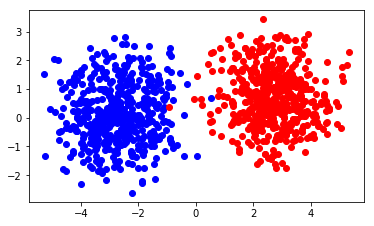

In [40]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [41]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [43]:
import keras.layers as kl

In [44]:
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='uniform', use_bias=False))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s - loss: 0.6906 - acc: 0.9310     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6884 - acc: 0.9890     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6861 - acc: 0.9980     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.6835 - acc: 0.9970     
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 0.6807 - acc: 0.9970     


In [46]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)

100/200 [==============>...............] - ETA: 0s

In [48]:
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

loss : 0.678815513849
acc : 1.0


In [49]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls_np = np.zeros((cls_idx.shape[0], 2))
cls_np[np.arange(cls_np.shape[0]), cls_idx] = 1

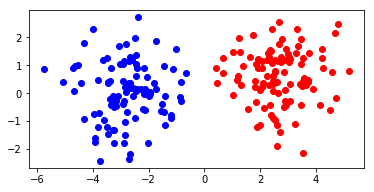

In [50]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls_np[:, 0]), 0], test_data[np.where(cls_np[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls_np[:, 1]), 0], test_data[np.where(cls_np[:, 1]), 1], 'ro')
ax.set_aspect('equal')

### The next set of data is not linearly separable:

In [51]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_moons, n_train=1000, n_test=200, noise=0.2)

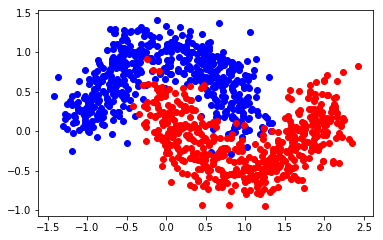

In [52]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [53]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [54]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s - loss: 0.6911 - acc: 0.6640     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6907 - acc: 0.6590     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6903 - acc: 0.6710     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.6896 - acc: 0.6750     
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 0.6888 - acc: 0.6990     


In [55]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

100/200 [==============>...............] - ETA: 0s
loss : 0.688152194023
acc : 0.705000013113


In [56]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

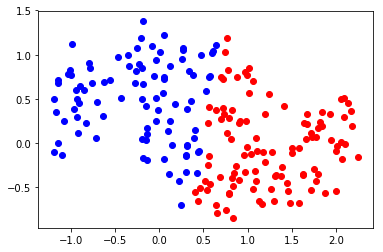

In [57]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [58]:
train_data, test_data, train_labels, test_labels = generate_dataset(make_circles, n_train=1000, n_test=200, noise=0.2, factor=0.1)

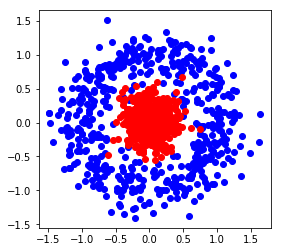

In [59]:
fig, ax = plt.subplots(1)
ax.plot(train_data[np.where(train_labels[:, 0]), 0], train_data[np.where(train_labels[:, 0]), 1], 'bo')
ax.plot(train_data[np.where(train_labels[:, 1]), 0], train_data[np.where(train_labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [60]:
train_labels = np.where(train_labels)[1]
test_labels = np.where(test_labels)[1]

In [61]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
1000/1000 [==============================] - 0s - loss: 0.6931 - acc: 0.3330     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6932 - acc: 0.3570     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6931 - acc: 0.3250     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.6931 - acc: 0.3270     
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 0.6931 - acc: 0.3340     


In [62]:
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

100/200 [==============>...............] - ETA: 0s
loss : 0.693711936474
acc : 0.335000008345


In [63]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1

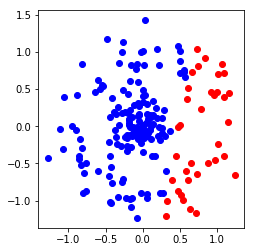

In [64]:
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [65]:
model = Sequential()
model.add(Dense(64, input_dim=2, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [66]:
model.fit(train_data, train_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)
print()
loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=BATCH_SIZE)
print()
for name, metric in zip(model.metrics_names, loss_and_metrics):
    print(name, ":", metric)

Epoch 1/5
1000/1000 [==============================] - 0s - loss: 0.6860 - acc: 0.6840     
Epoch 2/5
1000/1000 [==============================] - 0s - loss: 0.6680 - acc: 0.8520     
Epoch 3/5
1000/1000 [==============================] - 0s - loss: 0.6494 - acc: 0.8560     
Epoch 4/5
1000/1000 [==============================] - 0s - loss: 0.6303 - acc: 0.8670     
Epoch 5/5
1000/1000 [==============================] - 0s - loss: 0.6032 - acc: 0.9040     

100/200 [==============>...............] - ETA: 0s
loss : 0.583730697632
acc : 0.930000007153


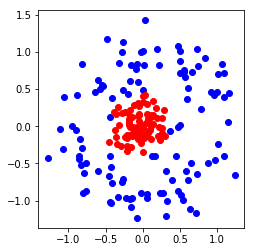

In [67]:
cls_idx = np.round(model.predict(test_data)).astype(int).squeeze()
cls = np.zeros((cls_idx.shape[0], 2))
cls[np.arange(cls.shape[0]), cls_idx] = 1
fig, ax = plt.subplots(1)
ax.plot(test_data[np.where(cls[:, 0]), 0], test_data[np.where(cls[:, 0]), 1], 'bo')
ax.plot(test_data[np.where(cls[:, 1]), 0], test_data[np.where(cls[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [33]:
import keras 

In [34]:
keras.__version__

'2.0.1'